In [201]:
import subprocess as sub
import os

import matplotlib.pyplot as plt
import math

In [238]:
ALGORITHMS = ['random_select', 'select']

N_VALUES = list(range(100, 10100, 100))
N_VALUES_FOR_SORTING = [100 * i for i in range(2, 201)]

REPEATS = 100

K_CALCULATING = [
    (lambda n: 1, 'k = 1'),
    (lambda n: n, 'k = n'),
    (lambda n: int(0.5 * n), 'k = int(0.5 * n)'),
    (lambda n: int(0.3 * n), 'k = int(0.3 * n)'),
    (lambda n: int(0.7 * n), 'k = int(0.7 * n)')
]

M_VALUES = [3, 5, 7, 9]

KEY_CALCULATING = [
    (lambda n, ns: int(ns[1]), 'key = first element'),
    (lambda n, ns: int(ns[-1]), 'key = last element'),
    (lambda n, ns: int(ns[n // 2]), 'key = mid element'),
    (lambda n, ns: int(ns[int(0.6 * n)]), 'key near the mid'),
    (lambda n, ns: 3 * n, 'key not in array')
]

In [203]:
def random_select_unit_test(data_type, n, k_calculating):
    comparisons_data = []
    swaps_data = []
    times_data = []

    out = sub.run('./data_generator {} {}'.format(data_type, n), shell=True, capture_output=True, encoding='utf-8')
    with open('tmp.txt', 'w') as tmp_file:
        tmp_file.write(out.stdout)

    for k_calc in k_calculating:
        comparisons_sum = 0
        swaps_sum = 0
        times_sum = 0
        for _ in range(REPEATS):
            out = sub.run('cat tmp.txt | ./random_select {}'.format(k_calc[0](n)), shell=True, capture_output=True, encoding='utf-8')
            out_result = out.stdout.split(' ')

            if len(out_result) < 4:
                continue   

            success = bool(out_result[0])
            comparisons = int(out_result[1])
            swaps = int(out_result[2])
            exec_time = float(out_result[3])

            comparisons_sum += comparisons
            swaps_sum += swaps
            times_sum += exec_time

        comparisons_data.append(comparisons_sum / REPEATS)
        swaps_data.append(swaps_sum / REPEATS)
        times_data.append(exec_time / REPEATS)

    return comparisons_data, swaps_data, times_data

In [204]:
def select_unit_test(data_type, n, m, k_calculating):
    comparisons_data = []
    swaps_data = []
    times_data = []

    out = sub.run('./data_generator {} {}'.format(data_type, n), shell=True, capture_output=True, encoding='utf-8')
    with open('tmp.txt', 'w') as tmp_file:
        tmp_file.write(out.stdout)

    for k_calc in k_calculating:
        comparisons_sum = 0
        swaps_sum = 0
        times_sum = 0
        for _ in range(REPEATS):
            out = sub.run('cat tmp.txt | ./select {} {}'.format(k_calc[0](n), m), shell=True, capture_output=True, encoding='utf-8')
            out_result = out.stdout.split(' ')

            if len(out_result) < 4:
                continue   

            success = bool(out_result[0])
            comparisons = int(out_result[1])
            swaps = int(out_result[2])
            exce_time = float(out_result[3])

            comparisons_sum += comparisons
            swaps_sum += swaps
            times_sum += exce_time

        comparisons_data.append(comparisons_sum / REPEATS)
        swaps_data.append(swaps_sum / REPEATS)
        times_data.append(times_sum / REPEATS)

    return comparisons_data, swaps_data, times_data

In [222]:
colors = ('r', 'g', 'b', 'y', 'm')

def visualise_select_stats(data, n_values, title):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle(title)
    ax1.set_xlabel('n')
    ax1.set_title('Comparision Number / n')
    ax2.set_xlabel('n')
    ax2.set_title('Swaps Number / n')
    ax3.set_xlabel('n')
    ax3.set_title('Time [millis] / n')

    lines = []
    labels = []

    for k in range(len(K_CALCULATING)):
        comparisions = []
        swaps = []
        times = []
        for n, calculations in zip(n_values, data):
            comparisions.append(calculations[0][k] / n)
            swaps.append(calculations[1][k] / n)
            times.append(calculations[2][k] / n)

        label1 = ax1.scatter(n_values, comparisions, color=colors[k], marker='x')
        label2 = ax2.scatter(n_values, swaps, color=colors[k], marker='x')
        label3 = ax3.scatter(n_values, times, color=colors[k], marker='x')

        lines.append(label1)
        labels.append(K_CALCULATING[k][1])

    fig.legend(lines, labels=labels, loc='upper right', bbox_to_anchor = (1.0, 0.6))

In [206]:
random_select_data = []
for n in N_VALUES:
    random_select_data.append(random_select_unit_test('r', n, K_CALCULATING))

/tmp/ipykernel_3076/434050458.py:32: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(lines, labels=labels, loc='upper right', bbox_to_anchor = (1.0, 0.6))


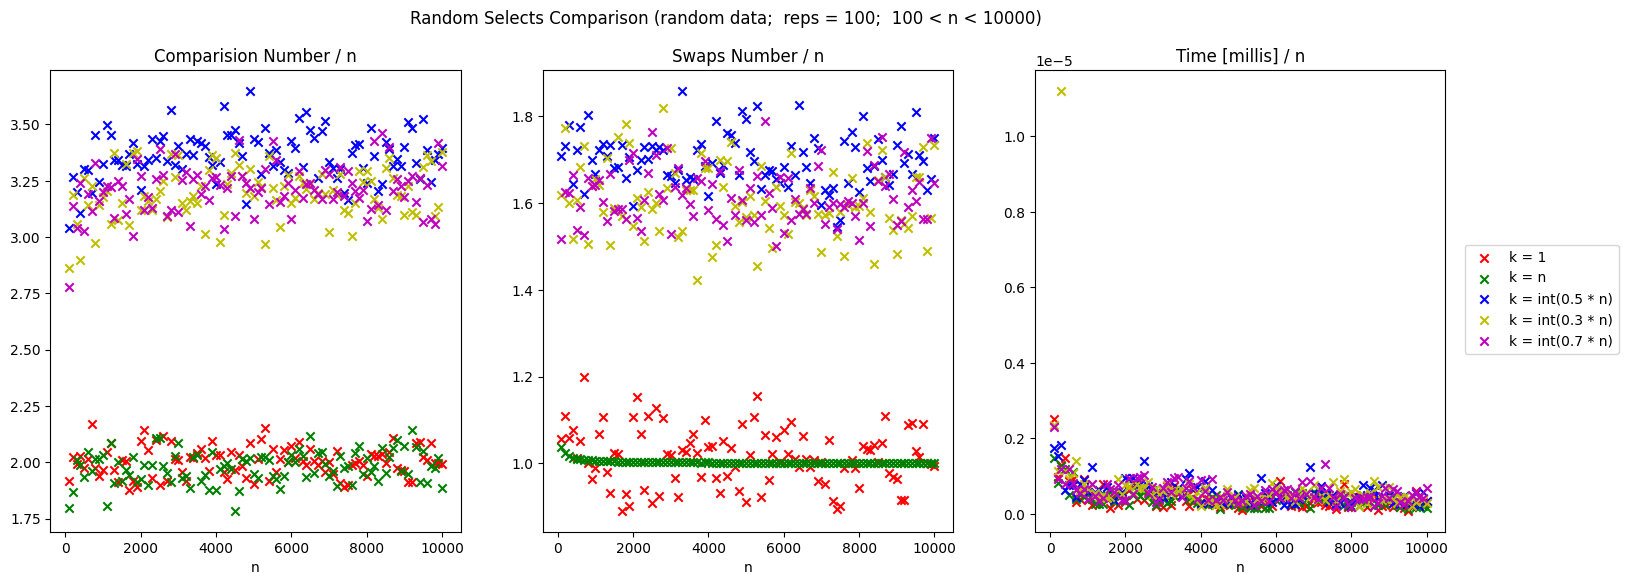

In [223]:
visualise_select_stats(
    random_select_data, 
    N_VALUES, 
    'Random Selects Comparison (random data;  reps = {};  {} < n < {})'.format(REPEATS, N_VALUES[0], N_VALUES[-1]))

In [208]:
select_data = []
for n in N_VALUES:
    select_data.append(select_unit_test('r', n, 7, K_CALCULATING))

/tmp/ipykernel_3076/434050458.py:32: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(lines, labels=labels, loc='upper right', bbox_to_anchor = (1.0, 0.6))


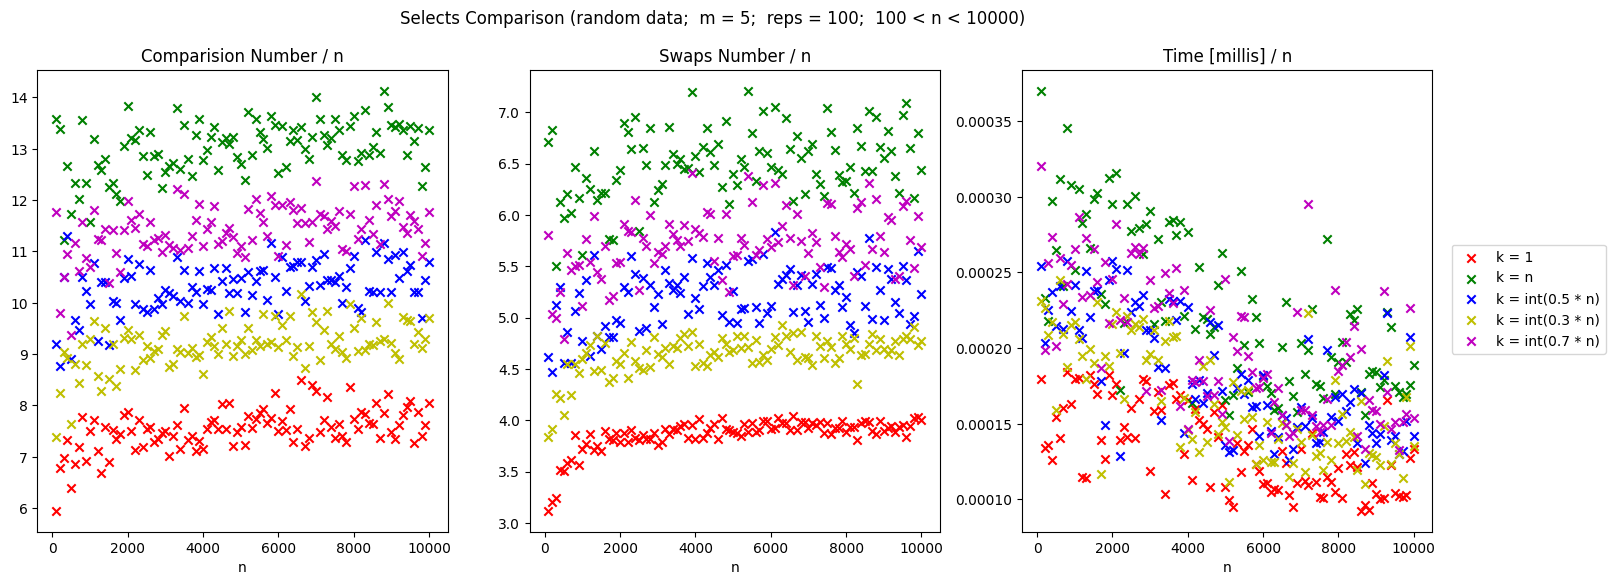

In [224]:
visualise_select_stats(
    select_data, 
    N_VALUES, 
    'Selects Comparison (random data;  m = {};  reps = {};  {} < n < {})'.format(5, REPEATS, N_VALUES[0], N_VALUES[-1]))

In [225]:
def visualise_m_choosing(data, n_values, title):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle(title)
    ax1.set_xlabel('n')
    ax1.set_title('Comparision Number / n')
    ax2.set_xlabel('n')
    ax2.set_title('Swaps Number / n')
    ax3.set_xlabel('n')
    ax3.set_title('Time [millis] / n')

    lines = []
    labels = []

    for i, m in enumerate(M_VALUES):
        comparisions = []
        swaps = []
        times = []
        for n, calculations in zip(n_values, data[m]):
            comparisions.append(calculations[0][0] / n)
            swaps.append(calculations[1][0] / n)
            times.append(calculations[2][0] / n)

        label1 = ax1.scatter(n_values, comparisions, color=colors[i], marker='x')
        label2 = ax2.scatter(n_values, swaps, color=colors[i], marker='x')
        label3 = ax3.scatter(n_values, times, color=colors[i], marker='x')

        lines.append(label1)
        labels.append('m = ' + str(m))

    fig.legend(lines, labels=labels, loc='upper right', bbox_to_anchor = (1.0, 0.6))

In [211]:
select_m_choosing = {}

for m in M_VALUES:
    select_m_choosing[m] = []
    for n in N_VALUES:
        select_m_choosing[m].append(select_unit_test('r', n, m, [K_CALCULATING[2]]))

/tmp/ipykernel_3076/3829416246.py:30: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(lines, labels=labels, loc='upper right', bbox_to_anchor = (1.0, 0.6))


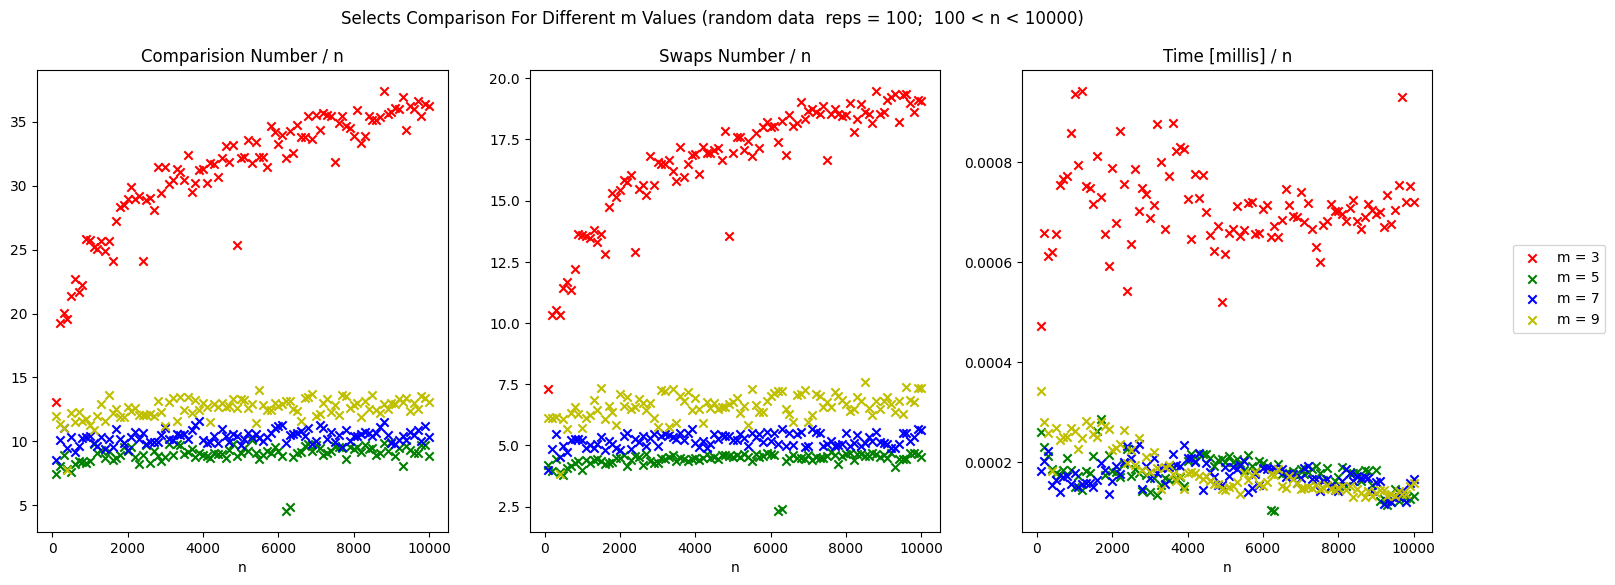

In [226]:
visualise_m_choosing(
    select_m_choosing, 
    N_VALUES,
    'Selects Comparison For Different m Values (random data  reps = {};  {} < n < {})'.format(REPEATS, N_VALUES[0], N_VALUES[-1]))

In [213]:
def binary_search_unit_test(n, data_type, key_calculating):
    comparisons_data = {}
    times_data = {}

    for k_calc in key_calculating:
        comparisons_data[k_calc[1]] = []
        times_data[k_calc[1]] = []

        for _ in range(REPEATS):
            out = sub.run('./data_generator {} {}'.format(data_type, n), shell=True, capture_output=True, encoding='utf-8')
            with open('tmp.txt', 'w') as tmp_file:
                tmp_file.write(out.stdout)

            with open('tmp.txt', 'r') as tmp_file:
                ns = tmp_file.readlines()
            
                comparisons_sum = 0
                times_sum = 0

                out = sub.run('cat tmp.txt | ./binary_search {}'.format(k_calc[0](n, ns)), shell=True, capture_output=True, encoding='utf-8')
                out_result = out.stdout.split(' ')
                if len(out_result) < 3:
                    continue   

                success = bool(out_result[0])
                comparisons = int(out_result[1])
                exce_time = float(out_result[2])

                comparisons_sum += comparisons
                times_sum += exce_time

                comparisons_data[k_calc[1]].append(comparisons_sum / REPEATS)
                times_data[k_calc[1]].append(times_sum / REPEATS)

    return comparisons_data, times_data

In [214]:
def visualise_binary_search(data, n_values, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
    fig.suptitle(title)
    ax1.set_xlabel('n')
    ax1.set_title('Comparision Number / log(n)')
    ax2.set_xlabel('n')
    ax2.set_title('Time [millis] / log(n)')

    lines = []
    labels = []

    for i, k in enumerate(KEY_CALCULATING):
        comparisions = []
        times = []
        for n, calculations in zip(n_values, data):
            comparisions.append(sum(calculations[0][k[1]]) / len(calculations[0][k[1]]) / math.log2(n))
            times.append(sum(calculations[1][k[1]]) / len(calculations[1][k[1]]) / math.log2(n))

        label1 = ax1.scatter(n_values, comparisions, color=colors[i], marker='x')
        label2 = ax2.scatter(n_values, times, color=colors[i], marker='x')

        lines.append(label1)
        labels.append(KEY_CALCULATING[i][1])

    fig.legend(lines, labels=labels, loc='upper right', bbox_to_anchor = (1.0, 0.6))

In [215]:
binary_search = []
for n in N_VALUES:
    binary_search.append(binary_search_unit_test(n, 'a', KEY_CALCULATING))

/tmp/ipykernel_3076/2995236917.py:25: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(lines, labels=labels, loc='upper right', bbox_to_anchor = (1.0, 0.6))


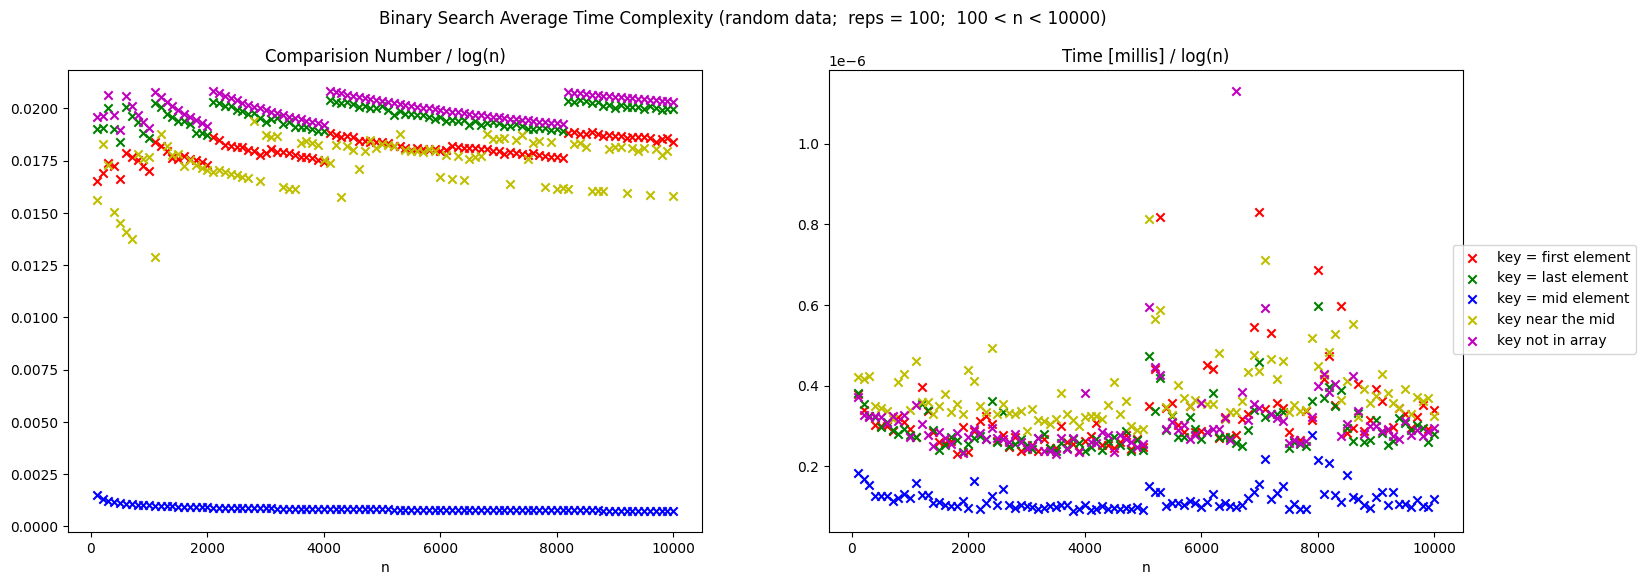

In [216]:
visualise_binary_search(
    binary_search,
    N_VALUES,
    'Binary Search Average Time Complexity (random data;  reps = {};  {} < n < {})'.format(REPEATS, N_VALUES[0], N_VALUES[-1])
)

In [241]:
def test_sorting_alg(data_type, algorithm, algorithm_args, n_values, repeats):
    comparisons_data = []
    swaps_data = []
    times_data = []
    for n in n_values:
        comparisons_sum = 0
        swaps_sum = 0
        times_sum = 0
        for _ in range(repeats):
            out = sub.run('./data_generator {} {} | ./{} {}'.format(data_type, n, algorithm, algorithm_args), 
                            shell=True, capture_output=True, encoding="utf-8")
            result = out.stdout.split('\n')

            if len(result) < 4:
                continue
            
            success = bool(result[0])
            comparisons = int(result[1])
            swaps = int(result[2])
            exec_time = float(result[3])

            comparisons_sum += comparisons
            swaps_sum += swaps
            times_sum += exec_time

        comparisons_data.append(comparisons_sum / repeats)
        swaps_data.append(swaps_sum / repeats)
        times_data.append(times_sum / repeats)

    return comparisons_data, swaps_data, times_data

In [264]:
def visualise_sorting_stats(data, n_values, title):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle(title)
    ax1.set_xlabel('n')
    ax1.set_title('Comparision Number')
    ax2.set_xlabel('n')
    ax2.set_title('Swaps Number')
    ax3.set_xlabel('n')
    ax3.set_title('Time [millis]')

    lines = []
    labels = []

    color = 0
    for label, results in data.items():
        comparisions = []
        swaps = []
        times = []

        for i, n in enumerate(n_values):
            comparisions.append(results[0][i] / n / math.log2(n))
            swaps.append(results[1][i] / n / math.log2(n))
            times.append(results[2][i] / n / math.log2(n))

        label1 = ax1.scatter(n_values, comparisions, color=colors[color], marker='x')
        label2 = ax2.scatter(n_values, swaps, color=colors[color], marker='x')
        label3 = ax3.scatter(n_values, times, color=colors[color], marker='x')

        color += 1

        lines.append(label1)
        labels.append(label)


    fig.legend(lines, labels=labels, loc='upper right', bbox_to_anchor = (1.0, 0.6))

In [266]:
standard_quick_sort_random_data = test_sorting_alg('r', 'quick_sort_normal', '', N_VALUES_FOR_SORTING, REPEATS)
median_quick_sort_random_data = test_sorting_alg('r', 'quick_sort_median_pivot', '5', N_VALUES_FOR_SORTING, REPEATS)

In [ ]:
standard_dual_pivot_random_data = test_sorting_alg('r', 'dual_pivot_quick_sort_normal', '', N_VALUES_FOR_SORTING, REPEATS)
median_dual_pivot_random_data = test_sorting_alg('r', 'dual_pivot_quick_sort_median_pivots', '5', N_VALUES_FOR_SORTING, REPEATS)

/tmp/ipykernel_3076/2391094668.py:35: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(lines, labels=labels, loc='upper right', bbox_to_anchor = (1.0, 0.6))


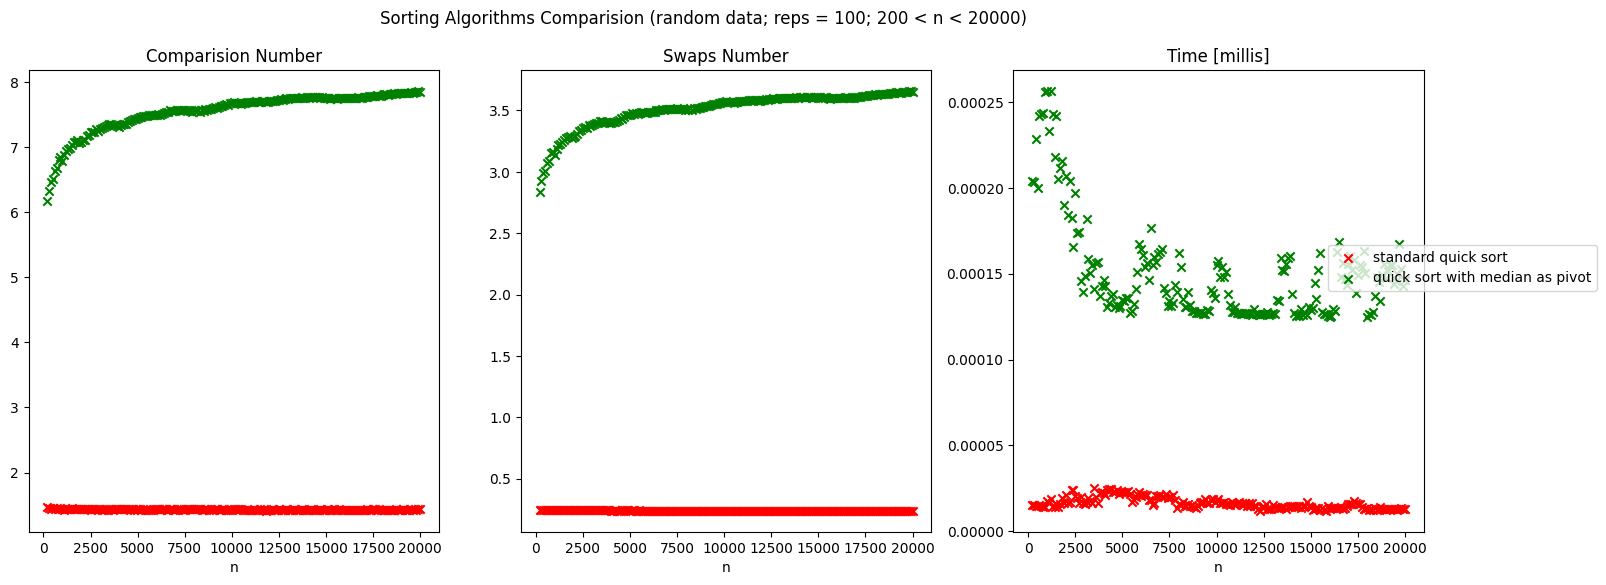

In [267]:
visualise_sorting_stats(
    {
        'standard quick sort' : standard_quick_sort_random_data,
        'quick sort with median as pivot' : median_quick_sort_random_data,
        'standard dual pivot quick sort' : standard_dual_pivot_random_data,
        'dual pivot quick sort with medians as pivots' : median_dual_pivot_random_data
    },
    N_VALUES_FOR_SORTING,
    'Sorting Algorithms Comparision (random data; reps = 100; 200 < n < 20000)'
)